In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
%matplotlib inline

# Bank Marketing Data - A Decision Tree Approach

## Aim:
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.
### Step 1: Load the data
- Load `bank.csv' data
- Check the first five observations
- Check if there are any null values

In [36]:
bankdat = pd.read_csv('data/bank.csv')
bankdat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
bankdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Summay of data

### Categorical Variables :
**[1] job      :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital  :** married, single, divorced
<br>**[3] education:** secondary, tertiary, primary, unknown
<br>**[4] default  :** yes, no
<br>**[5] housing  :** yes, no
<br>**[6] loan     :** yes, no 
<br>**[7] deposit  :** yes, no **(Dependent Variable)**
<br>**[8] contact  :** unknown, cellular, telephone
<br>**[9] month    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome:** unknown, other, failure, success

### Numerical Variables :
[1] age
<br>[2] balance
<br>[3] day
<br>[4] duration
<br>[5] campaign
<br>[6] pdays
<br>[7] previous

In [38]:
numer_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categ_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [39]:
is_categ = bankdat.drop('deposit', axis=1).dtypes == 'object'
Xcols = bankdat.columns.drop('deposit')
cat_vars = Xcols[is_categ]
num_vars = Xcols[~is_categ]
print(cat_vars)
print(num_vars)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


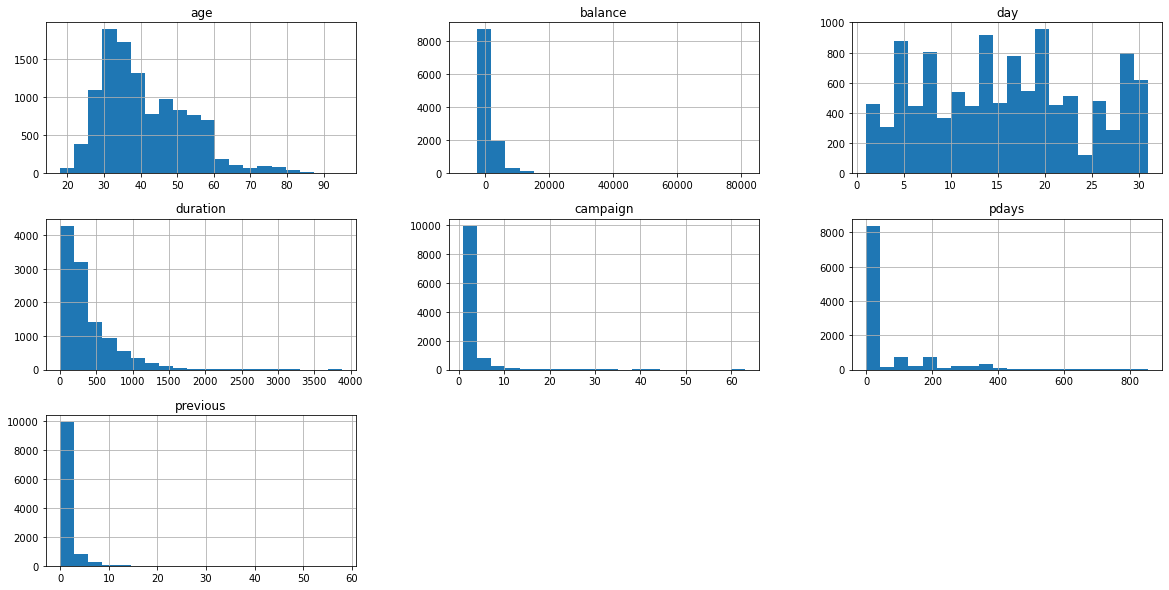

In [40]:
hist = bankdat[numer_vars].hist(figsize=(20,10), bins=20)

### Step 2: Transformer
- Create a trasnformer pipeline for numeric and categorical features. numerical features will be imputed and scaled. Categorical features will be imputed and encoded
- Create a Column transformer

In [41]:
numpipe = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
catpipe = Pipeline([
    ('cat_imputer', SimpleImputer(missing_values='unknown', strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

In [42]:
preprocessor = ColumnTransformer([
    ('num', numpipe, numer_vars),
    ('cat', catpipe, categ_vars)
])

### Step 3: Classifier
- Create a pipeline for the decision tree classifier as well as the transformer
- Encode the target variable using `LabelEncoder`

In [52]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3))
])

In [54]:
bankdf = bankdat.copy()
bankdf['deposit_tgt'] = LabelEncoder().fit_transform(bankdat.deposit)
X = bankdf[numer_vars+categ_vars]
y = bankdf.deposit_tgt

### Step 4: Model
- Create a pipeline for the decision tree classifier as well as the transformer
- Encode the target variable using `LabelEncoder`

In [55]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=.2, stratify=y)
clf.fit(Xtr, ytr)
print("Train score: ", clf.score(Xtr, ytr))
print("Test score: ", clf.score(Xts, yts))

Train score:  0.7698510471497368
Test score:  0.7653381101656964
